# Clasificación Binaria

<div style="text-align: right"> Diego Emiliano Rodea Ruano 

**Importamos las librerías y la información para clasificar**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

data_file = '~/downloads/ex2data1.txt'
data = pd.read_csv(data_file, header=None)

**Acomados la información en dos vectores, uno de dos columnas y otro con la información de 0s y 1s**

In [2]:
X = data.iloc[:,0:2].values   #Todos en 2 columnas
Y = data.iloc[:,2].values     #Todos en arreglo
X,Y

(array([[34.62365962, 78.02469282],
        [30.28671077, 43.89499752],
        [35.84740877, 72.90219803],
        [60.18259939, 86.3085521 ],
        [79.03273605, 75.34437644],
        [45.08327748, 56.31637178],
        [61.10666454, 96.51142588],
        [75.02474557, 46.55401354],
        [76.0987867 , 87.42056972],
        [84.43281996, 43.53339331],
        [95.86155507, 38.22527806],
        [75.01365839, 30.60326323],
        [82.30705337, 76.4819633 ],
        [69.36458876, 97.71869196],
        [39.53833914, 76.03681085],
        [53.97105215, 89.20735014],
        [69.07014406, 52.74046973],
        [67.94685548, 46.67857411],
        [70.66150955, 92.92713789],
        [76.97878373, 47.57596365],
        [67.37202755, 42.83843832],
        [89.67677575, 65.79936593],
        [50.53478829, 48.85581153],
        [34.21206098, 44.2095286 ],
        [77.92409145, 68.97235999],
        [62.27101367, 69.95445795],
        [80.19018075, 44.82162893],
        [93.1143888 , 38.800

**Si graficamos X, los valores primarios vs los secundarios y los coloreamos dependiendo de Y**

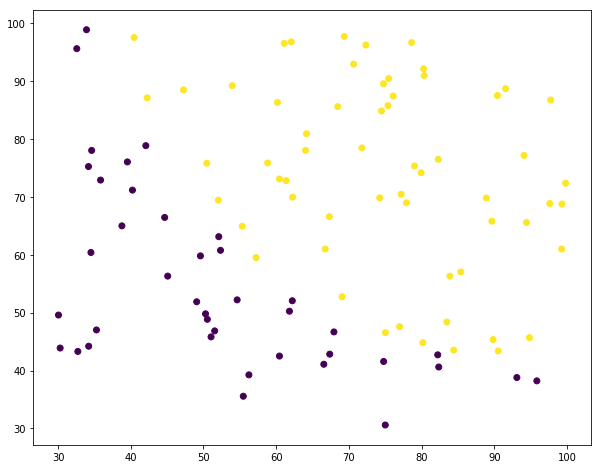

In [3]:
plt.figure(figsize=(10,8))
plt.scatter(X[:, 0],X[:, 1], c=Y)
plt.show()

**Con esta información podemos ver que se puede crear un parecido con una regresión lineal para separar los valores**

**Se definen las funciones para la clasificación binaria, la primera es la función Sigmoide, luego un regresor logístico(porque una regresión lineal no es posible) y la función de optimización a una función convexa**

In [4]:
def fun_log(z):      #Sigmoide (función logística)
    return 1/(1+np.exp(-z))

def reg_log(B, X):   #Definición del regresor logísitico
    Xa = np.append(np.ones((X.shape[0],1)), X, axis=1)
    return fun_log(Xa.dot(B))

def fun_obj(B, X, Y):  #Función de optimización cambiada a modo convexo
    Yhat = 0.99999*reg_log(B, X)
    return np.mean(-Y*np.log(Yhat)-(1-Y)*np.log(1-Yhat))

**Creamos un vector de 3 ceros, para agregarle las soluciónes de optimización de la funcion convexa y utilizando los datos de X y Y**

In [5]:
B0 = np.zeros((3,))
B0

array([0., 0., 0.])

In [6]:
res_clas = opt.minimize(fun_obj, B0, args=(X,Y))
res_clas

      fun: 0.20350075799655104
 hess_inv: array([[ 3.23952596e+03, -2.58283284e+01, -2.64135044e+01],
       [-2.58283284e+01,  2.19939996e-01,  1.97976323e-01],
       [-2.64135044e+01,  1.97976323e-01,  2.30638454e-01]])
      jac: array([1.67638063e-08, 1.90176070e-06, 2.12341547e-07])
  message: 'Optimization terminated successfully.'
     nfev: 135
      nit: 20
     njev: 27
   status: 0
  success: True
        x: array([-25.16172543,   0.20623588,   0.20147452])

In [7]:
B = res_clas.x
B

array([-25.16172543,   0.20623588,   0.20147452])

**Se crea un vector de llamado x con que de una columna que va del 20 al 110 con step de 0.5, esto nos genera 180 filas**

In [8]:
x = np.arange(20, 110, 0.5)
x

array([ 20. ,  20.5,  21. ,  21.5,  22. ,  22.5,  23. ,  23.5,  24. ,
        24.5,  25. ,  25.5,  26. ,  26.5,  27. ,  27.5,  28. ,  28.5,
        29. ,  29.5,  30. ,  30.5,  31. ,  31.5,  32. ,  32.5,  33. ,
        33.5,  34. ,  34.5,  35. ,  35.5,  36. ,  36.5,  37. ,  37.5,
        38. ,  38.5,  39. ,  39.5,  40. ,  40.5,  41. ,  41.5,  42. ,
        42.5,  43. ,  43.5,  44. ,  44.5,  45. ,  45.5,  46. ,  46.5,
        47. ,  47.5,  48. ,  48.5,  49. ,  49.5,  50. ,  50.5,  51. ,
        51.5,  52. ,  52.5,  53. ,  53.5,  54. ,  54.5,  55. ,  55.5,
        56. ,  56.5,  57. ,  57.5,  58. ,  58.5,  59. ,  59.5,  60. ,
        60.5,  61. ,  61.5,  62. ,  62.5,  63. ,  63.5,  64. ,  64.5,
        65. ,  65.5,  66. ,  66.5,  67. ,  67.5,  68. ,  68.5,  69. ,
        69.5,  70. ,  70.5,  71. ,  71.5,  72. ,  72.5,  73. ,  73.5,
        74. ,  74.5,  75. ,  75.5,  76. ,  76.5,  77. ,  77.5,  78. ,
        78.5,  79. ,  79.5,  80. ,  80.5,  81. ,  81.5,  82. ,  82.5,
        83. ,  83.5,

**Se hace un segundo vector igual**

In [9]:
y = np.arange(20, 110, 0.5)
y

array([ 20. ,  20.5,  21. ,  21.5,  22. ,  22.5,  23. ,  23.5,  24. ,
        24.5,  25. ,  25.5,  26. ,  26.5,  27. ,  27.5,  28. ,  28.5,
        29. ,  29.5,  30. ,  30.5,  31. ,  31.5,  32. ,  32.5,  33. ,
        33.5,  34. ,  34.5,  35. ,  35.5,  36. ,  36.5,  37. ,  37.5,
        38. ,  38.5,  39. ,  39.5,  40. ,  40.5,  41. ,  41.5,  42. ,
        42.5,  43. ,  43.5,  44. ,  44.5,  45. ,  45.5,  46. ,  46.5,
        47. ,  47.5,  48. ,  48.5,  49. ,  49.5,  50. ,  50.5,  51. ,
        51.5,  52. ,  52.5,  53. ,  53.5,  54. ,  54.5,  55. ,  55.5,
        56. ,  56.5,  57. ,  57.5,  58. ,  58.5,  59. ,  59.5,  60. ,
        60.5,  61. ,  61.5,  62. ,  62.5,  63. ,  63.5,  64. ,  64.5,
        65. ,  65.5,  66. ,  66.5,  67. ,  67.5,  68. ,  68.5,  69. ,
        69.5,  70. ,  70.5,  71. ,  71.5,  72. ,  72.5,  73. ,  73.5,
        74. ,  74.5,  75. ,  75.5,  76. ,  76.5,  77. ,  77.5,  78. ,
        78.5,  79. ,  79.5,  80. ,  80.5,  81. ,  81.5,  82. ,  82.5,
        83. ,  83.5,

**Ahora creamos dos matrices(180x180) con la información de los dos vectores anteriores, la primera Xm tiene los vectores en filas, Ym tiene los vectores como columnas**

In [10]:
Xm, Ym = np.meshgrid(x, y)
Xm, Ym

(array([[ 20. ,  20.5,  21. , ..., 108.5, 109. , 109.5],
        [ 20. ,  20.5,  21. , ..., 108.5, 109. , 109.5],
        [ 20. ,  20.5,  21. , ..., 108.5, 109. , 109.5],
        ...,
        [ 20. ,  20.5,  21. , ..., 108.5, 109. , 109.5],
        [ 20. ,  20.5,  21. , ..., 108.5, 109. , 109.5],
        [ 20. ,  20.5,  21. , ..., 108.5, 109. , 109.5]]),
 array([[ 20. ,  20. ,  20. , ...,  20. ,  20. ,  20. ],
        [ 20.5,  20.5,  20.5, ...,  20.5,  20.5,  20.5],
        [ 21. ,  21. ,  21. , ...,  21. ,  21. ,  21. ],
        ...,
        [108.5, 108.5, 108.5, ..., 108.5, 108.5, 108.5],
        [109. , 109. , 109. , ..., 109. , 109. , 109. ],
        [109.5, 109.5, 109.5, ..., 109.5, 109.5, 109.5]]))

**Encontramos el tamaño de las matrices**

In [11]:
m,n = np.shape(Xm)
m,n

(180, 180)

**Ahora cambiamos la forma de la matriz de Xm en una columna, esto quiere decir que tendremos un vector tras otro en una dimensión**

In [12]:
Xmr = np.reshape(Xm,(m*n,1))
Xmr

array([[ 20. ],
       [ 20.5],
       [ 21. ],
       ...,
       [108.5],
       [109. ],
       [109.5]])

**Se hace lo mismo con Ym**

In [13]:
Ymr = np.reshape(Ym,(m*n,1))
Ymr 

array([[ 20. ],
       [ 20. ],
       [ 20. ],
       ...,
       [109.5],
       [109.5],
       [109.5]])

**Hacemos un nuevo vector que comprenda los dos anteriores uno en cada columna**

In [14]:
Xproof = np.append(Xmr,Ymr,axis=1)
Xproof

array([[ 20. ,  20. ],
       [ 20.5,  20. ],
       [ 21. ,  20. ],
       ...,
       [108.5, 109.5],
       [109. , 109.5],
       [109.5, 109.5]])

**Ahora podemos meter nuestra nueva matriz a la función del regresor logístico, con nuestras soluciones de la optimización**

In [15]:
Yg = reg_log(B, Xproof)
Yg

array([4.10893217e-08, 4.55525321e-08, 5.05005459e-08, ...,
       9.99999996e-01, 9.99999996e-01, 9.99999997e-01])

**Con este nuevo resultado(en forma de matriz) podemos crear una matriz ordenada con estos datos de dimensión 180 x 180**

In [16]:
Z = np.reshape(Yg, (m,n))
Z

array([[4.10893217e-08, 4.55525321e-08, 5.05005459e-08, ...,
        7.76321648e-01, 7.93716643e-01, 8.10089791e-01],
       [4.54442150e-08, 5.03804632e-08, 5.58528972e-08, ...,
        7.93326580e-01, 8.09723267e-01, 8.25105883e-01],
       [5.02606660e-08, 5.57200874e-08, 6.17725228e-08, ...,
        8.09356201e-01, 8.24762070e-01, 8.39170383e-01],
       ...,
       [6.94867939e-01, 7.16282391e-01, 7.36763295e-01, ...,
        9.99999995e-01, 9.99999995e-01, 9.99999996e-01],
       [7.15798335e-01, 7.36301318e-01, 7.55829723e-01, ...,
        9.99999995e-01, 9.99999996e-01, 9.99999996e-01],
       [7.35838821e-01, 7.55390098e-01, 7.73938887e-01, ...,
        9.99999996e-01, 9.99999996e-01, 9.99999997e-01]])

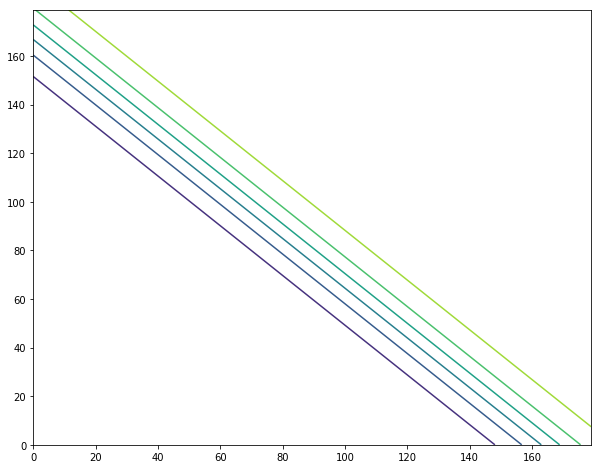

In [17]:
plt.figure(figsize=(10,8))
plt.contour(Z)
plt.show()

**Redondeamos los datos y podemos ver como Z ya es más una función que divide los datos de un lado y de otro**

In [18]:
Z = np.round(Z)
Z

array([[0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

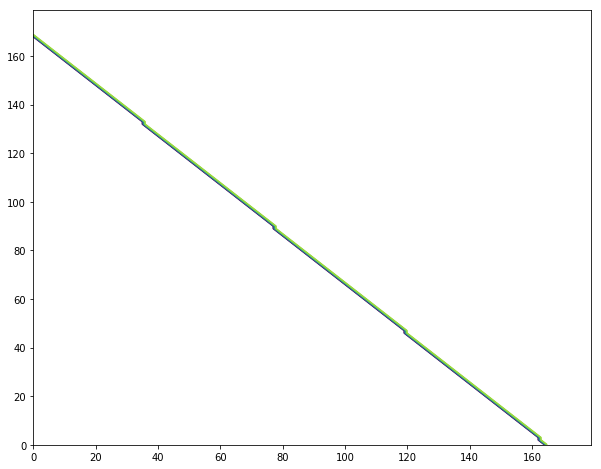

In [19]:
plt.figure(figsize=(10,8))
plt.contour(Z)
plt.show()

**Y graficamos X con el tamaño de Xm(de 20 a 110), Ym(de 20 a 110) junto con Z**

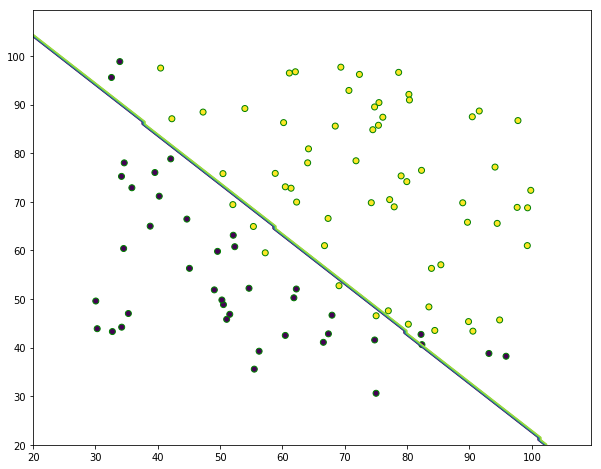

In [20]:
plt.figure(figsize=(10,8))
plt.contour(Xm,Ym,Z)
plt.scatter(X[:, 0],X[:, 1], c=Y, edgecolors='g')
plt.show()